In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re    # regular expression  (for removing special charachters)

In [103]:
# we use encoding here to encode the text, data like emoji
df=pd.read_csv('/content/drive/MyDrive/datasets/twitter_validation.csv',encoding='ISO-8859-1',header=None)
df

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [104]:
df.columns=['ID','location','target','text']
df

,ID,location,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [105]:
df.shape

(1000, 4)

In [106]:
df.tail()

,ID,location,target,text
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [107]:
df.head()

,ID,location,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [108]:
df.isna().sum()

ID          0
location    0
target      0
text        0
dtype: int64

In [109]:
df.dtypes

ID           int64
location    object
target      object
text        object
dtype: object

In [110]:
loc=df['location'].value_counts()
loc

RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
Facebook                             33
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Overwatch                            32
Hearthstone                          32
Verizon                              32
CS-GO                                32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                                27


<Axes: xlabel='count', ylabel='location'>

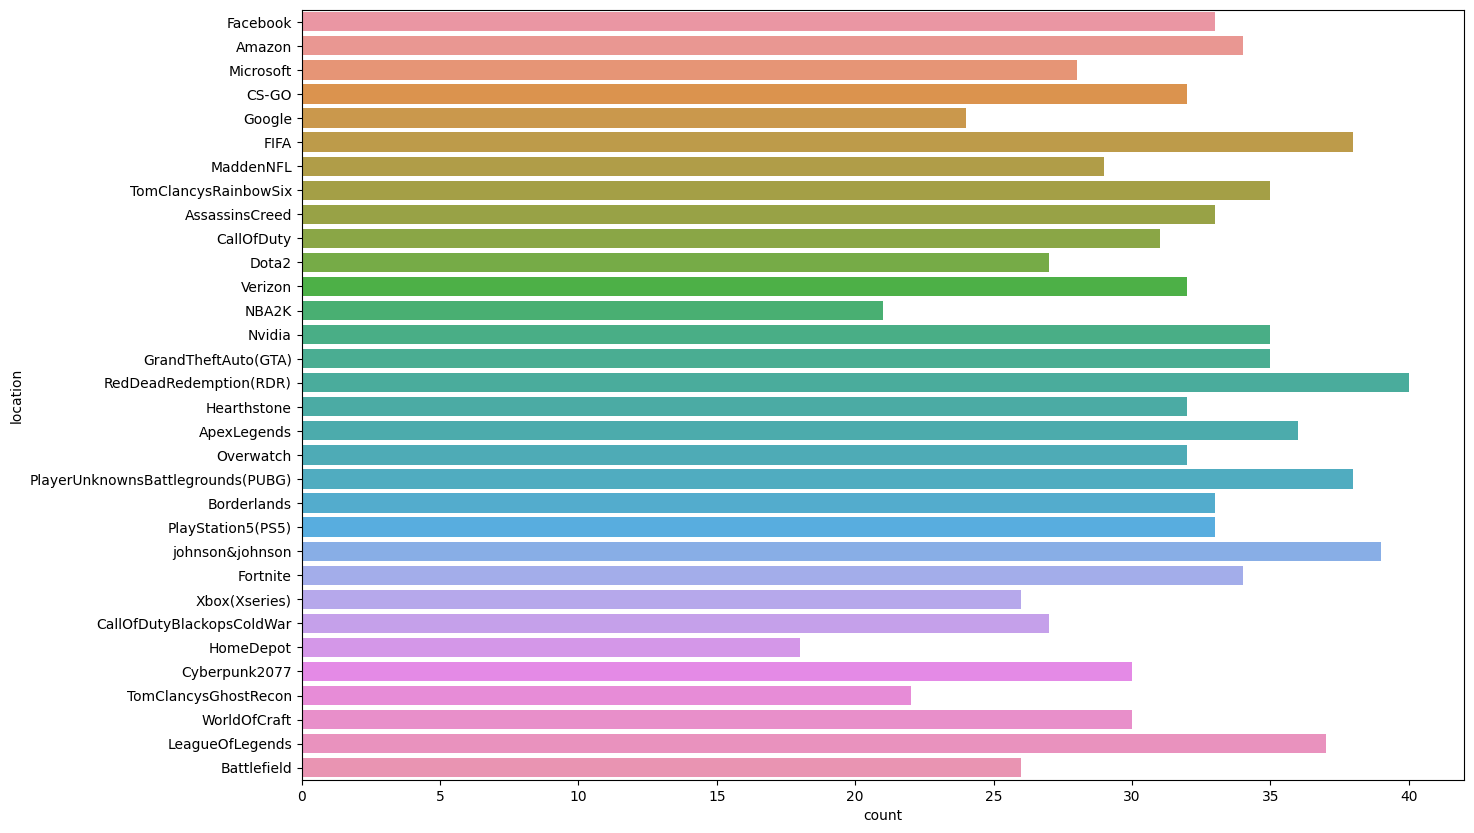

In [111]:
plt.figure(figsize=(15,10))
sns.countplot(y=df['location'])

In [112]:
tar=df['target'].value_counts()
tar

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: target, dtype: int64

<Axes: ylabel='target'>

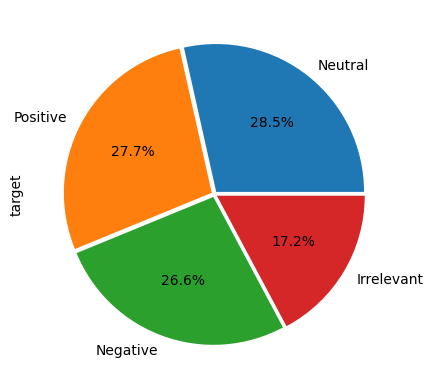

In [113]:
tar.plot(kind='pie',explode=(0.02,0.02,0.02,0.02),autopct='%1.1f%%')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Facebook'),
  Text(1, 0, 'Amazon'),
  Text(2, 0, 'Microsoft'),
  Text(3, 0, 'CS-GO'),
  Text(4, 0, 'Google'),
  Text(5, 0, 'FIFA'),
  Text(6, 0, 'MaddenNFL'),
  Text(7, 0, 'TomClancysRainbowSix'),
  Text(8, 0, 'AssassinsCreed'),
  Text(9, 0, 'CallOfDuty'),
  Text(10, 0, 'Dota2'),
  Text(11, 0, 'Verizon'),
  Text(12, 0, 'NBA2K'),
  Text(13, 0, 'Nvidia'),
  Text(14, 0, 'GrandTheftAuto(GTA)'),
  Text(15, 0, 'RedDeadRedemption(RDR)'),
  Text(16, 0, 'Hearthstone'),
  Text(17, 0, 'ApexLegends'),
  Text(18, 0, 'Overwatch'),
  Text(19, 0, 'PlayerUnknownsBattlegrounds(PUBG)'),
  Text(20, 0, 'Borderlands'),
  Text(21, 0, 'PlayStation5(PS5)'),
  Text(22, 0, 'johnson&johnson'),
  Text(23, 0, 'Fortnite'),
  Text(24, 0, 'Xbox(Xseries)'),
  Text(25, 0, 'CallOfDutyBlackopsColdWar'),
  Text(26, 0, 'HomeDepot'),
  Text(27, 0, 'Cyberpunk2077'),
  

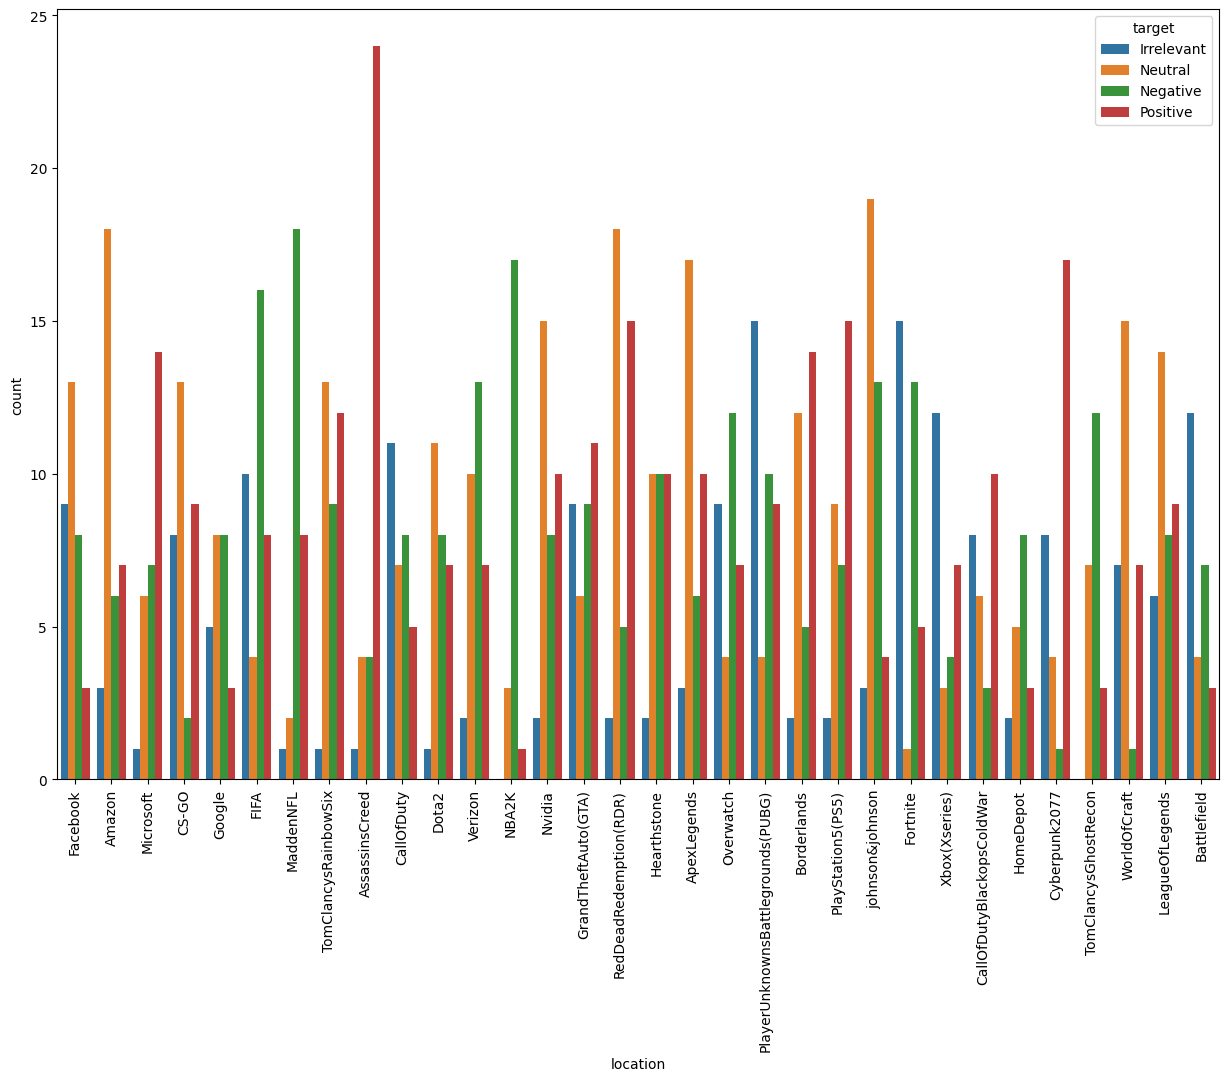

In [114]:
plt.figure(figsize=(15,10))
sns.countplot(x='location',data=df,hue='target')
plt.xticks(rotation=90)

In [115]:
text=df['text'].value_counts()
text

Wow                                                                                                                                                                                                                                                                2
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tomâs great auntie as âHayley canât get out of bedâ and told to his grandma, who now thinks Iâm a lazy, terrible person ð¤£    1
Update: I actually finished Odyssey. I wish the three-ponged questline structure was communicated a bit more clearly but that game is a lot of fun once it hits its stride. twitter.com/iv_javy/statusâ¦                                                          1
Know Your History...unless it involves China....because like....we have investors and shit...                                                                                                                            

In [116]:
df=df.drop(df.index[(df['target']=='Irrelevant')],axis=0)
df

,ID,location,target,text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [117]:
# reset index values
df.reset_index(drop=True,inplace=True)
df

,ID,location,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [118]:
df=df.drop(['ID','location'],axis=1)
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [119]:
# df['target']=df['target'].str.replace('Neutral','0')
# df['target']=df['target'].str.replace('Negative','-1')
# df['target']=df['target'].str.replace('Positive','1')    
# df['target']=df['target'].astype(int)    
# df    

# using map function

df['target']=df['target'].map({'Positive':1,'Negative':-1,'Neutral':0})

In [120]:
df.dtypes

target     int64
text      object
dtype: object

In [121]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [122]:
tweets=df.text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [123]:
# preprocessing 

from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [124]:
# special charachter remove
# re : regular expression we remove special charachters

tweets=tweets.str.replace('[^a-zA-Z-0-9]+',' ')
tweets

<ipython-input-124-d387f0562dfc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets=tweets.str.replace('[^a-zA-Z-0-9]+',' ')


0      BBC News - Amazon boss Jeff Bezos rejects clai...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826     Bought a fraction of Microsoft today Small wins 
827    Johnson Johnson to stop selling talc baby powd...
Name: text, Length: 828, dtype: object

In [125]:
# example for removal of special charachters

str1='wonderful @@@@peacock!12345#@!'
str2=re.sub('[^a-zA-Z-0-9]+',' ',str1)             # sub = replace
str2                                               #  '[^a-zA-Z-0-9]+'  here '^' denotes 'not in the string'
                                                   #                    here '+' denotes  'replace the combination of symbols

'wonderful peacock 12345 '

In [126]:
# stemming or lematization

from nltk.stem import SnowballStemmer
ss=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[ss.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:" ".join(x))
tweets

0      bbc news - amazon boss jeff bezo reject claim ...
1      microsoft whi do i pay for word when it functi...
2      csgo matchmak is so full of closet hack it s a...
3      now the presid is slap american in the face th...
4      hi eahelp i ve had madelein mccann in my cella...
                             ...                        
823    pleas explain how this is possibl how can they...
824    good on soni as much as i want to see the new ...
825    today suck so it s time to drink wine n play b...
826       bought a fraction of microsoft today small win
827    johnson johnson to stop sell talc babi powder ...
Name: text, Length: 828, dtype: object

In [127]:
# stopwords

nltk.download('stopwords')
from nltk.corpus import stopwords
sw=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
tweets


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0      bbc news - amazon boss jeff bezo reject claim ...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      hi eahelp madelein mccann cellar past 13 year ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine n play borderland s...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder u c...
Name: text, Length: 828, dtype: object

In [128]:
# vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(tweets)
print(train_data)         #x

  (0, 739)	0.2456282916977699
  (0, 524)	0.2456282916977699
  (0, 3629)	0.19717097284763976
  (0, 883)	0.11802111433875656
  (0, 1063)	0.2456282916977699
  (0, 1193)	0.22139963227270484
  (0, 2103)	0.12503547156807654
  (0, 342)	0.2135997461023189
  (0, 913)	0.16343698819954885
  (0, 857)	0.2018385048310212
  (0, 2902)	0.2456282916977699
  (0, 612)	0.2456282916977699
  (0, 1930)	0.23145543449136263
  (0, 679)	0.2135997461023189
  (0, 412)	0.14270670271218175
  (0, 2404)	0.365996231282465
  (0, 581)	0.46291086898272527
  (1, 847)	0.4055823664694651
  (1, 3039)	0.4055823664694651
  (1, 2693)	0.3821800909185634
  (1, 1479)	0.4055823664694651
  (1, 3849)	0.36557591217188057
  (1, 2595)	0.3126902562590763
  (1, 3808)	0.26216072802580975
  (1, 2266)	0.24555654927912696
  :	:
  (825, 677)	0.22981061112100945
  (825, 1056)	0.2315686698425631
  (825, 3532)	0.21750175079084832
  (825, 3380)	0.2904718522758868
  (825, 2661)	0.17148706662740873
  (826, 1453)	0.5079831062080814
  (826, 3222)	0.4786

In [129]:
train_data.shape

(828, 3961)

In [130]:
y=df['target'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [131]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.30,random_state=42)
print(x_train)

  (0, 2833)	0.22445333746210416
  (0, 721)	0.23819743082652528
  (0, 0)	0.23819743082652528
  (0, 1717)	0.22445333746210416
  (0, 3411)	0.23819743082652528
  (0, 3470)	0.23819743082652528
  (0, 1447)	0.22445333746210416
  (0, 2063)	0.23819743082652528
  (0, 335)	0.23819743082652528
  (0, 2582)	0.19573239287831176
  (0, 1715)	0.22445333746210416
  (0, 409)	0.1774619718703711
  (0, 3554)	0.1804114056568988
  (0, 1294)	0.14874102728657873
  (0, 2140)	0.284319400937232
  (0, 3777)	0.16565538326448254
  (0, 59)	0.16771038243892572
  (0, 3049)	0.15258254163782356
  (0, 1313)	0.14997378514152887
  (0, 3605)	0.15849261671802412
  (0, 2834)	0.16771038243892572
  (0, 3609)	0.15258254163782356
  (0, 3171)	0.19573239287831176
  (0, 3629)	0.19120606523479225
  (1, 307)	0.23042284485480724
  :	:
  (577, 742)	0.14968891974696927
  (577, 1947)	0.16302270346202263
  (577, 3767)	0.18158863086173657
  (577, 2317)	0.18717313645751385
  (577, 1165)	0.18717313645751385
  (577, 3396)	0.16302270346202263
  (5

In [132]:
# model creation
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
s_model=SVC()
n_model=MultinomialNB()
k_model=KNeighborsClassifier()
r_model=RandomForestClassifier()
d_model=DecisionTreeClassifier()
lst_model=[s_model,n_model,k_model,r_model,d_model]

In [133]:
for i in lst_model:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(i)
  print('*'*100)
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))


SVC()
****************************************************************************************************
[[43 32  4]
 [ 7 59 13]
 [12 36 43]]
              precision    recall  f1-score   support

          -1       0.69      0.54      0.61        79
           0       0.46      0.75      0.57        79
           1       0.72      0.47      0.57        91

    accuracy                           0.58       249
   macro avg       0.62      0.59      0.58       249
weighted avg       0.63      0.58      0.58       249

MultinomialNB()
****************************************************************************************************
[[47 25  7]
 [14 44 21]
 [15 23 53]]
              precision    recall  f1-score   support

          -1       0.62      0.59      0.61        79
           0       0.48      0.56      0.51        79
           1       0.65      0.58      0.62        91

    accuracy                           0.58       249
   macro avg       0.58      0.58      0.58      